#Chapter II: Discrete-time Signals and Systems
## What are the classic elemental signals?
Sum of unit impulse sequence
$$x_k[n] = \delta [n-k]$$
Sum of harmonically related exponentials
$$x_k[n] = e^{j\omega _k n}, \quad k = \{0, 1, \dots, N-1\}, \quad \omega_k = \frac{2\pi}{N}k$$
The last one is convenient for input signals with N period.


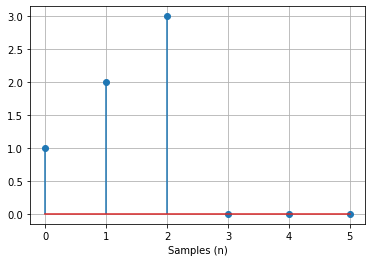

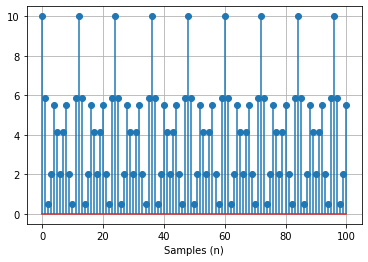

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget

# Represent a signal using unit impulses
n = np.arange(0, 6)
x = np.double(n == 0) + 2 * np.double(n == 1) + 3 * np.double(n == 2)

plt.figure(1)
plt.stem(n, x)
plt.xlabel("Samples (n)")
plt.grid(True)

n = np.arange(0, 101)
x = 4 + np.exp(1j * 2 * np.pi / 12 * n) + 2 * np.exp(1j * 4 * np.pi / 12 * n) + 3 * np.exp(1j * 6 * np.pi / 12 * n)

plt.figure()
plt.stem(n, np.real(x))
plt.xlabel("Samples (n)")
plt.grid(True)
plt.show()



### What is the response of a LTI system?
**Definition**: The decomposition of  into a weighted sum of impulses allows us to know its response to LTI systems at rest.

**Initial rest condition of LTI system**: $y\left\lbrack k\right\rbrack =0,\;k<0$

**Unitary impulse system response** : 
Additionally, the impulse response of the system for $n=k$ is defined as $ H[n,k] $ :

$$h[n, k] = T\{ \delta [n - k] \}$$

Then, $x[n]$ can be expressed as a sum of unit impulses:
$$x[n] = \sum_{k = -\infty}^{+\infty} x[k] \delta [n-k]$$


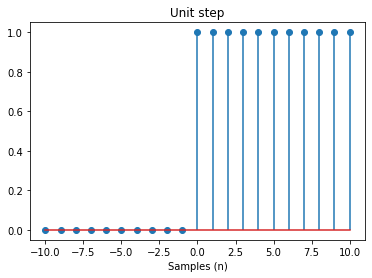

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Represent the unit step using unit impulses for n = -10:10
n = np.arange(-10, 11)
x = np.double(n >= 0)

plt.figure()
plt.stem(n, x)
plt.xlabel("Samples (n)")
plt.title("Unit step")
plt.show()



From there, $y[n]$ can be easily calculated by the linear property:
$$y[n] = T\left\{ \sum_{k=-\infty}^{+\infty} x[k]\delta [n-k] \right\} = \sum_{k=-\infty}^{+\infty} x[k]T\left\{\delta [n-k]\right\} \\ y[n] = \sum_{k=-\infty}^{+\infty} x[k] h[n, k]$$
Then, applying time-invariant property:
$$h[n] = T\{\delta[n]\} \rightarrow h[n, k] = T \{ \delta[n-k]\} = h[n-k]$$
Finally:
$$y[n] = x[n] * h[n] = \sum_{k=-\infty}^{+\infty} x[k] h[n-k]$$
This demonstrate that SLTI is completely characterized by its unit impulse response$h[n]$ .

*_Example_*
Find the discrete value of $y[n ]$
$$x[n] = \{1, 2, 3\};\quad y[n] = x[n] - 2x[n-1]$$


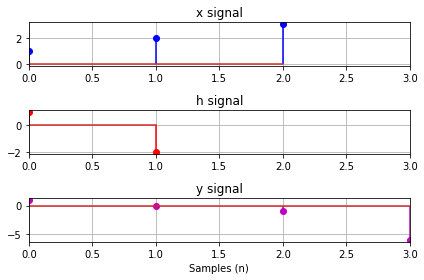

In [ ]:


# Solution with Python
x = np.array([1, 2, 3])
h = np.array([1, -2])
y = np.convolve(x, h)

plt.figure(4)
plt.subplot(3, 1, 1)
plt.stem(np.arange(len(x)), x, linefmt='b-', markerfmt='bo')
plt.title("x signal")
plt.grid(True)
plt.xlim([0, 3])

plt.subplot(3, 1, 2)
plt.stem(np.arange(len(h)), h, linefmt='r-', markerfmt='ro')
plt.title("h signal")
plt.grid(True)
plt.xlim([0, 3])

plt.subplot(3, 1, 3)
plt.stem(np.arange(len(y)), y, linefmt='m-', markerfmt='mo')
plt.title("y signal")
plt.xlabel("Samples (n)")
plt.grid(True)
plt.xlim([0, 3])

plt.tight_layout()
plt.show()



### What are the properties of convolution?
####Commutative
$$x[n] * h[n] = h[n] * x[n] \\ \sum_{k=-\infty}^{+\infty} x[k] h[n-k] = \sum_{k=-\infty}^{+\infty} h[k] x[n-k]$$


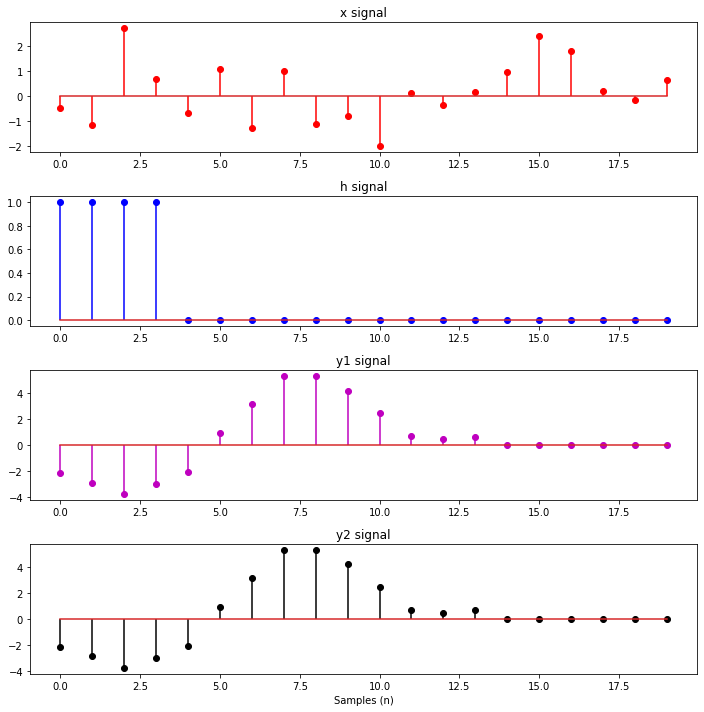

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Show the commutative property using Python
n = np.arange(20)
x = np.random.randn(20)
h = np.zeros(20)
h[n < 4] = 1
y1 = np.convolve(x, h, mode="same")
y2 = np.convolve(h, x, mode="same")

plt.figure(figsize=(10,10))
plt.subplot(4, 1, 1)
plt.stem(n, x, linefmt='r-', markerfmt='ro')
plt.title("x signal")

plt.subplot(4, 1, 2)
plt.stem(n, h, linefmt='b-', markerfmt='bo')
plt.title("h signal")

plt.subplot(4, 1, 3)
plt.stem(n, y1, linefmt='m-', markerfmt='mo')
plt.title("y1 signal")

plt.subplot(4, 1, 4)
plt.stem(n, y2, linefmt='k-', markerfmt='ko')
plt.xlabel("Samples (n)")
plt.title("y2 signal")

plt.tight_layout()
plt.show()


####Identity and displacement
$$x[n] * \delta [n] = x[n] \\x[n] * \delta [n-k] = x[n-k]$$



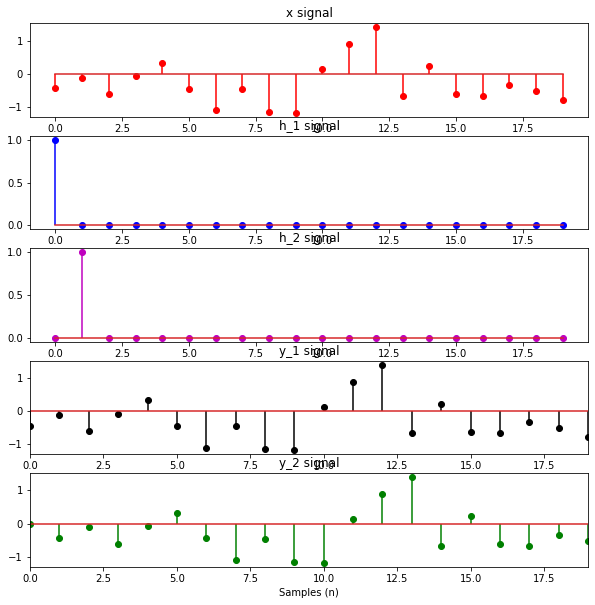

In [ ]:
n = np.arange(0, 20)
x = np.random.randn(20)
h1 = np.zeros(20); h1[n==0] = 1
h2 = np.zeros(20); h2[n==1] = 1
y1 = np.convolve(x, h1)
y2 = np.convolve(x, h2)

plt.figure(figsize=(10,10))
plt.subplot(5, 1, 1); plt.stem(n, x, "r"); plt.title("x signal")
plt.subplot(5, 1, 2); plt.stem(n, h1, "b"); plt.title("h_1 signal")
plt.subplot(5, 1, 3); plt.stem(n, h2, "m"); plt.title("h_2 signal")
plt.subplot(5, 1, 4); plt.stem(np.arange(len(y1)), y1, "k"); plt.title("y_1 signal"); plt.xlim([0, 19])
plt.subplot(5, 1, 5); plt.stem(np.arange(len(y2)), y2, "g"); plt.xlabel("Samples (n)"); plt.title("y_2 signal"); plt.xlim([0, 19])
plt.show()


####Associative
$$[x[n] * h_1[n]] * h_2[n] = x[n] * [h_1[n] * h_2[n]]$$


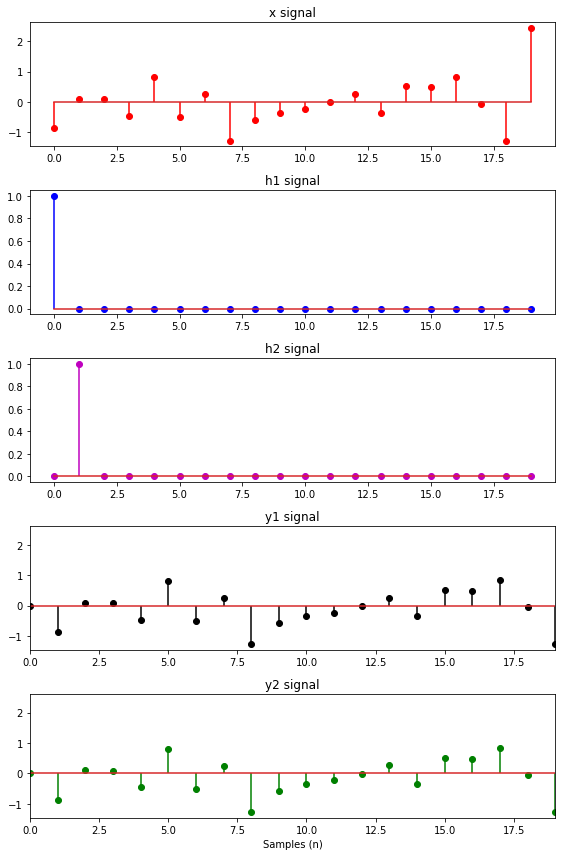

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 20)
x = np.random.randn(20)
h1 = np.zeros(20); h1[n==0] = 1
h2 = np.zeros(20); h2[n==1] = 1
y1 = np.convolve(np.convolve(x, h1), h2)
y2 = np.convolve(x, np.convolve(h1, h2))

fig, axs = plt.subplots(5, 1, figsize=(8,12))
axs[0].stem(n, x, 'r'); axs[0].set_title('x signal')
axs[1].stem(n, h1, 'b'); axs[1].set_title('h1 signal')
axs[2].stem(n, h2, 'm'); axs[2].set_title('h2 signal')
axs[3].stem(np.arange(len(y1)), y1, 'k'); axs[3].set_title('y1 signal'); axs[3].set_xlim([0, 19])
axs[4].stem(np.arange(len(y2)), y2, 'g'); axs[4].set_xlabel('Samples (n)'); axs[4].set_title('y2 signal'); axs[4].set_xlim([0, 19])

plt.tight_layout()
plt.show()


####Distributive
$$x[n] * [h_1[n] + h_2[n]] = x[n] * h_1[n] + x[n] * h_2[n]$$


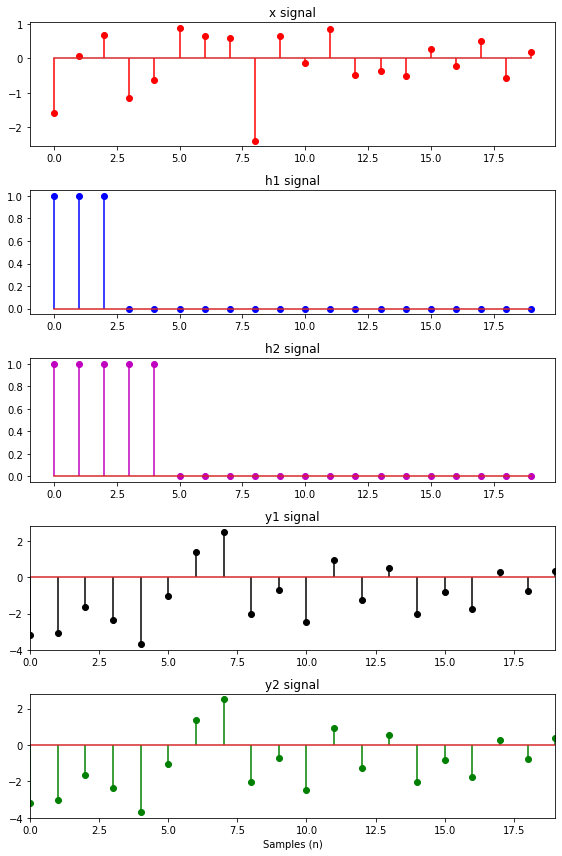

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 20)
x = np.random.randn(20)
h1 = np.zeros(20); h1[n<3] = 1
h2 = np.zeros(20); h2[n<5] = 1
y1 = np.convolve(x, h1+h2)
y2 = np.convolve(x, h1) + np.convolve(x, h2)

fig, axs = plt.subplots(5, 1, figsize=(8,12))
axs[0].stem(n, x, 'r'); axs[0].set_title('x signal')
axs[1].stem(n, h1, 'b'); axs[1].set_title('h1 signal')
axs[2].stem(n, h2, 'm'); axs[2].set_title('h2 signal')
axs[3].stem(np.arange(len(y1)), y1, 'k'); axs[3].set_title('y1 signal'); axs[3].set_xlim([0, 19])
axs[4].stem(np.arange(len(y2)), y2, 'g'); axs[4].set_xlabel('Samples (n)'); axs[4].set_title('y2 signal'); axs[4].set_xlim([0, 19])

plt.tight_layout()
plt.show()


### What is a causal LTI system?
A causal SLTI generates a $y[n]$ response that only depends of the samples for $n>=0$. This implies a direct condition in the impulse response to the system $h[n]=0,n<0$.
$$y[n] = \sum_{k=0}^{+\infty} h[k] x[n-k],\quad \forall n$$
It is necessary to identify the sequences as follows:
* Causal sequence: $y\left\lbrack n\right\rbrack =0,n<0$
* Non-causal sequence: $y\left\lbrack n\right\rbrack \not= 0,n<0\;\wedge \;n\ge 0$
* This also implies that a sequence represented by its impulse response of a system, the system would be causal or not causal, respectively.

If $x[n]$ is causal:
$$y[n] = \sum_{k=0}^n h[k] x[n-k],\quad \forall n$$
The responses of a causal system to a causal input is a causal sequence.


Text(0.5, 1.0, 'y signal')

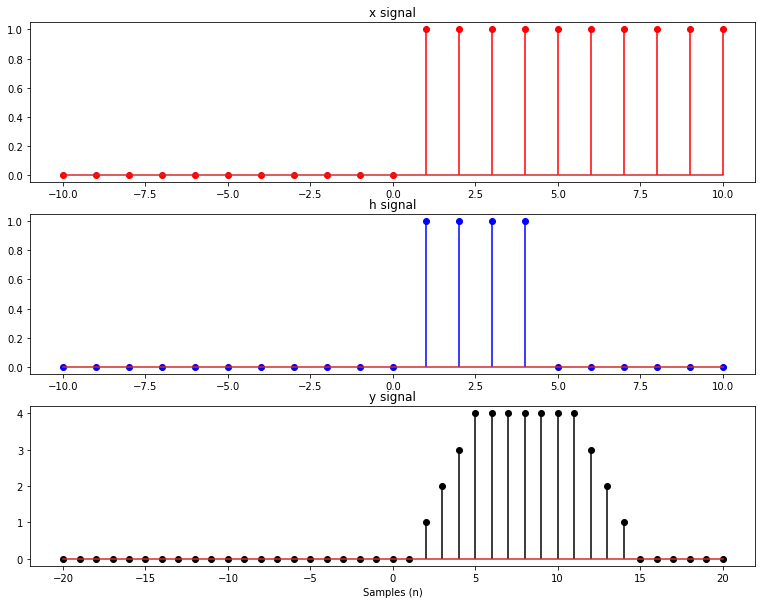

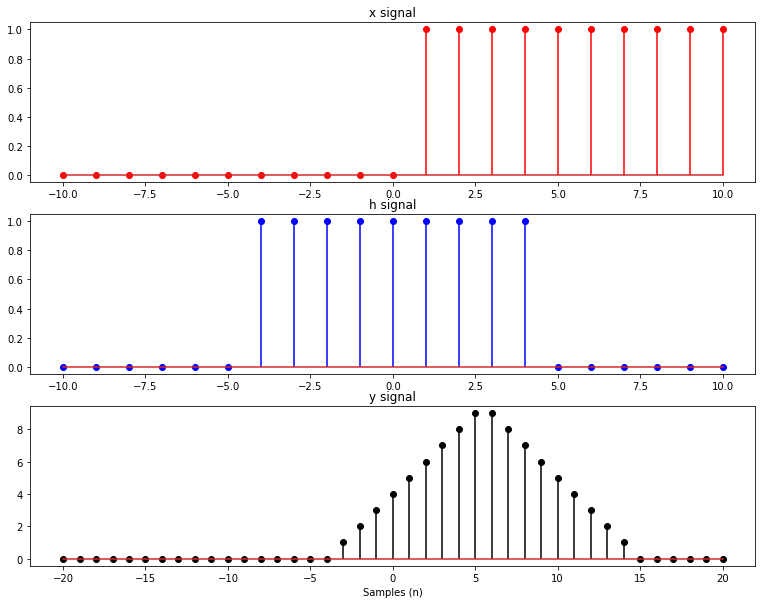

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-10, 11)
x = np.zeros_like(n); x[n > 0] = 1
h = np.zeros_like(n); h[(n > 0) & (n < 5)] = 1
y = np.convolve(x, h)
ny = np.arange(2*n[0], 2*n[-1]+1)
plt.figure(figsize=(13,10))
plt.subplot(3, 1, 1); plt.stem(n, x, "r"); plt.title("x signal")
plt.subplot(3, 1, 2); plt.stem(n, h, "b"); plt.title("h signal")
plt.subplot(3, 1, 3); plt.stem(ny, y, "k"); plt.xlabel("Samples (n)"); plt.title("y signal")

n = np.arange(-10, 11)
x = np.zeros_like(n); x[n > 0] = 1
h = np.zeros_like(n); h[(n > -5) & (n < 5)] = 1
y = np.convolve(x, h)
ny = np.arange(2*n[0], 2*n[-1]+1)
plt.figure(figsize=(13,10))
plt.subplot(3, 1, 1); plt.stem(n, x, "r"); plt.title("x signal")
plt.subplot(3, 1, 2); plt.stem(n, h, "b"); plt.title("h signal")
plt.subplot(3, 1, 3); plt.stem(ny, y, "k"); plt.xlabel("Samples (n)"); plt.title("y signal")


### How is described the BIBO stability of a system?
Remember that the BIBO-stable condition is:
$$|x[n]| \leq M_x \leq \infty,\quad \forall n \rightarrow |y[n]| \leq M_x \leq \infty$$
Taking into consideration that the response of a system is:
$$|y[n]| = \left| \sum_{k=-\infty}^{+\infty} h[k] x[n-k] \right| \leq \sum_{k=-\infty}^{+\infty} |h[k]|x[n-k]|$$

Using $|x\left\lbrack n\right\rbrack |\le M_x$ which is the **B**ounded **I**nput:
$$|y[n]| \leq M_x \sum_{k=-\infty}^{+\infty} |h[k]|$$
Then, the enough and necessary condition for the **B**ounded **O**utput is:
$$S_n = \left| \sum_{k=-\infty}^{+\infty} h[k] \right| < \infty$$
Which means that it is an absolutely summable impulse response.


Text(0.5, 0, 'Samples (n)')

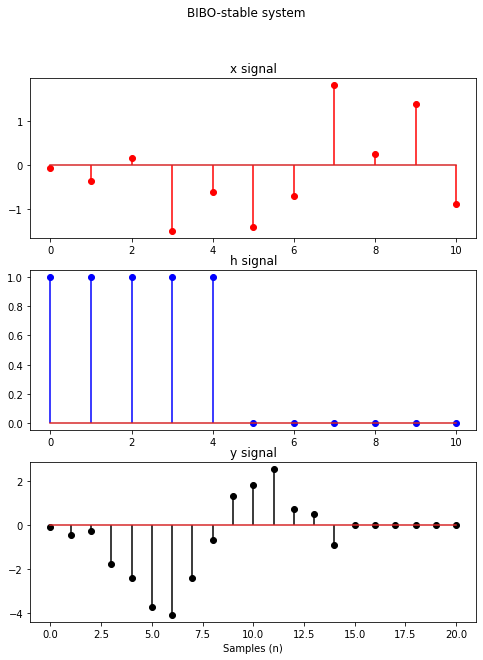

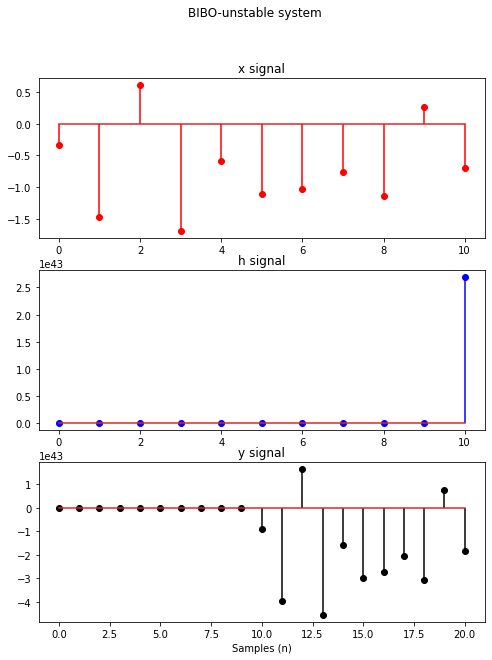

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 11)
h = np.zeros(len(n))
h[n < 5] = 1
x = np.random.randn(len(n))
y = np.convolve(x, h, mode='full')
ny = np.arange(n[0]+n[0], n[-1]+n[-1]+1)

fig, axs = plt.subplots(3, 1,figsize=(8, 10))

fig.suptitle('BIBO-stable system')
axs[0].stem(n, x, 'r')
axs[0].set_title('x signal')
axs[1].stem(n, h, 'b')
axs[1].set_title('h signal')
axs[2].stem(ny, y, 'k')
axs[2].set_title('y signal')
axs[2].set_xlabel('Samples (n)')

n = np.arange(0, 11)
h = np.exp(10*n)
x = np.random.randn(len(n))
y = np.convolve(x, h, mode='full')
ny = np.arange(n[0]+n[0], n[-1]+n[-1]+1)

fig2, axs2 = plt.subplots(3, 1,figsize=(8, 10))
fig2.suptitle('BIBO-unstable system')
axs2[0].stem(n, x, 'r')
axs2[0].set_title('x signal')
axs2[1].stem(n, h, 'b')
axs2[1].set_title('h signal')
axs2[2].stem(ny, y, 'k')
axs2[2].set_title('y signal')
axs2[2].set_xlabel('Samples (n)')

# plt.show()


### What are the types of impulse responses?
#### Finite Impulse Response (FIR)
Assuming a causal system:
$$y[n] = \sum_{k=0}^{M-1}h[k]x[n-k]$$
Output of the last M samples.
#### Infinite Impulse Response (IIR)
Assuming a causal system:
$$y[n] = \sum_{k=0}^\infty h[k]x[n-k]$$
Output of all the samples.
### Systems described as difference equations
FIR allows the calculation of $y[n]$ from convolution, while IIR requires an infinite number of operations. IIR is not directly implementable using convolution but it is possible with difference equations.
Example: cumulative mean
$$y[n] = \frac{1}{n+1} \sum_{k=0}^n x[k] ,\quad n \geq 0$$
$$(n+1) y[n] = \sum_{k = 0}^{n-1} x[k] + x[n],\quad n \geq 0$$
$$y[n] = \frac{n}{n+1} y[n-1] + \frac{1}{n+1}x[n],\quad n \geq 0$$
This allows to calculate recursively and with finite elements.

![imag2](https://github.com/piero-latorre/DSP/blob/main/II/image_0.png?raw=true)

* **Recursive causal system**: system which its operation is applied to previous and present input samples such as previous output samples.
$$y[n] = F[y[n-1], \dots , y[n-N], x[n]. x[n-1], \dots, x[n-M]$$
* **Non-recursive causal system**: system which operation is applied only to previous and present input samples.
$$y[n] = F[x[n], x[n-1], \dots , x[n-M]$$
A FIR causal system could be calculated with a non-recursive way from a direct implementation of the convolution.
$$y[n] = \sum_{k=0}^M h[k]x[n-k]$$
The general equation of recursive causal systems:
$$y[n] = -\sum_{k=1}^N a_k y[n-k] + \sum_{k=1}^M b_k x[n-k]$$
or
$$\sum_{k=1}^N a_k y[n-k] = \sum_{k=1}^M b_k x[n-k],\quad a_0 = 1$$
**Particular case**: SLTI based on difference equations of constant coefficients
$$y[n] = ay[n-1] + x[n]$$
Assume that the initial condition $y\left\lbrack -1\right\rbrack$ exists. Find the answer for zero state ($y\left\lbrack n\right\rbrack =0,\;n<0$) and zero input ($y\left\lbrack n\right\rbrack =0,\;n<0$).


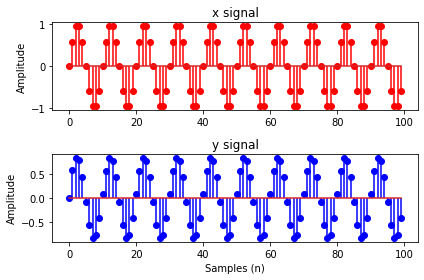

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 100)
ts = 0.01
x = np.sin(2*np.pi*10*n*ts)
b = 1
a = [1, -0.2]
y = np.zeros_like(x)

for i in range(len(x)):
    y[i] = b * x[i] + np.sum(a[1:] * y[max(0, i-1):i][::-1])

plt.figure()
plt.subplot(2, 1, 1)
plt.stem(n, x, 'r')
plt.ylabel('Amplitude')
plt.title('x signal')

plt.subplot(2, 1, 2)
plt.stem(n, y, 'b')
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.title('y signal')

plt.tight_layout()
plt.show()


Conditions of linearity to general form:
* The total response of a LTI system based on differential equations of constant coefficients is equal to the sum of the zero state and zero input.
* The principle of the superposition applies to the zero-state response
* The principle of the superposition applies to the zero-input response
A system that does not satisfy all three separate requirements is by definition non-linear.
### How can we describe the correlation between signals?
Unlike convolution operation, the main purpose of correlation is to measure the degree of similarity between two signals.
Classic example: sonar
* $x\left\lbrack n\right\rbrack$: sampled version of the transmitted signal.$y\left\lbrack n\right\rbrack$ : sampled version of the received signal
* If there is a close objetct, $y\left\lbrack n\right\rbrack$ would be a delayed version of the transmitted signal


$$y[n] = \alpha x[n-D] + \omega[n]$$
$$\alpha: \text{attenuation factor},\space D: \text{delay round trip}, \space \omega[n]: \text{additive noise}$$
It is of interest to compare $y\left\lbrack n\right\rbrack$ and $x\left\lbrack n\right\rbrack$ to determine if there is an object and calculate its distance using the information of the delay.

![img31](https://github.com/piero-latorre/DSP/blob/main/II/image_1.png?raw=true)

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

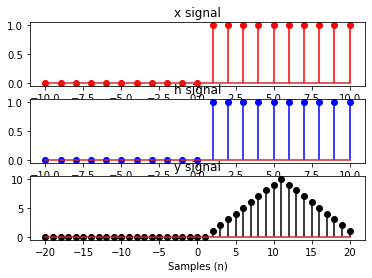

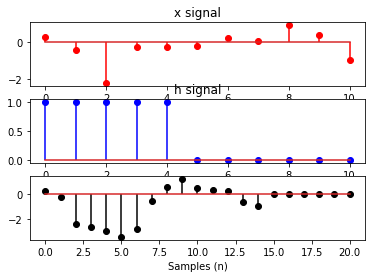

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system impulse response
n = np.arange(-10, 11)
h = np.zeros_like(n)
h[n>0] = 1

# Define the input signal
x = np.zeros_like(n)
x[n>0] = 1

# Compute the system output
y = np.convolve(x, h)
ny = np.arange(n[0]+n[0], n[-1]+n[-1]+1)

# Plot the signals
plt.figure()
plt.subplot(3, 1, 1)
plt.stem(n, x, 'r')
plt.title('x signal')
plt.subplot(3, 1, 2)
plt.stem(n, h, 'b')
plt.title('h signal')
plt.subplot(3, 1, 3)
plt.stem(ny, y, 'k')
plt.xlabel('Samples (n)')
plt.title('y signal')

# Define a BIBO-stable system
n = np.arange(0, 11)
h = np.zeros_like(n)
h[n<5] = 1

# Define the input signal
x = np.random.randn(len(n))

# Compute the system output
y = np.convolve(x, h)
ny = np.arange(n[0]+n[0], n[-1]+n[-1]+1)

# Plot the signals
plt.figure()
plt.subplot(3, 1, 1)
plt.stem(n, x, 'r')
plt.title('x signal')
plt.subplot(3, 1, 2)
plt.stem(n, h, 'b')
plt.title('h signal')
plt.subplot(3, 1, 3)
plt.stem(ny, y, 'k')
plt.xlabel('Samples (n)')
plt.title


Cross-correlation: given two real sequences ($x\left\lbrack n\right\rbrack$,$y\left\lbrack n\right\rbrack$ ) of finite energy, the cross-correlation is:
$$r_{xy} = \sum_{n=-\infty}^\infty x[n]y[n-l],\quad l \in \mathbb{Z}$$
or
$$r_{xy}[l] = \sum_{n = -\infty}^\infty x[n+l]y[n],\quad l \in \mathbb{Z}$$
Index xy or yx indicates the direction of the offset of a sequence respect to the other:
$$xy:\leftarrow xy\rightarrow | yx:\leftarrow yx \rightarrow$$
If the signals are reversed:
$$r_{yx} = \sum_{n = -\infty}^\infty y[n] x[n-l],\quad l \in \mathbb{Z}$$
It can be concluded that:
$$r_{xy} [l] = r_{yx} [-l]$$
Then, both signals have the same information but reflected.


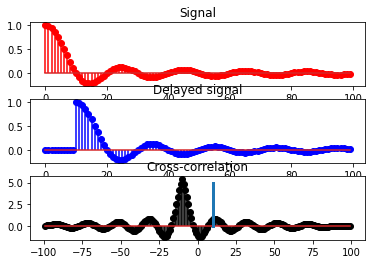

In [ ]:
n = np.arange(0, 100)
x1 = np.sinc(n * 1 / 10)
x2 = np.concatenate((np.zeros(10), x1[:-10]))
rxy = np.correlate(x1, x2, mode='full')
lagrxy = np.arange(-len(x2)+1, len(x1))

fig, axs = plt.subplots(3, 1)
axs[0].stem(n, x1, 'r')
axs[0].set_title('Signal')
axs[1].stem(n, x2, 'b')
axs[1].set_title('Delayed signal')
axs[2].stem(lagrxy, rxy, 'k')
axs[2].set_title('Cross-correlation')
axs[2].plot([10, 10], [0, 5], linewidth=3)
plt.show()


**Autocorrelation**: in the special case that $x\left\lbrack n\right\rbrack =y\left\lbrack n\right\rbrack$, the autocorrelation of $x\left\lbrack n\right\rbrack$ is given by:
$$r_{xx}[l] = \sum_{n = -\infty}^\infty x[n] x[n-l] = \sum_{n = -\infty}^\infty x[n+l] x[n],\quad l \in \mathbb{Z}$$


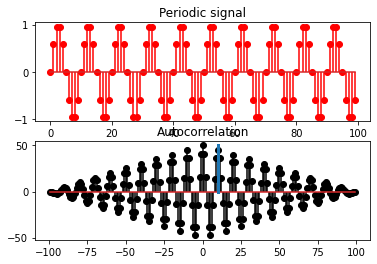

In [ ]:

# Compute the autocorrelation of a periodic signal
n = np.arange(100)
x = np.sin(2*np.pi*5*n/50)
rxx, lagrxx = np.correlate(x, x, mode='full'), np.arange(-99, 100)

plt.figure()
plt.subplot(2, 1, 1); plt.stem(n, x, "r"); plt.title("Periodic signal")
plt.subplot(2, 1, 2); plt.stem(lagrxx, rxx, "k"); plt.title("Autocorrelation")
plt.plot([10, 10], [0, 50], linewidth=3)
plt.show()


If  $x\left\lbrack n\right\rbrack$ and  $y\left\lbrack n\right\rbrack$ are causal sequences with N samples:
$$r_{xy}[l] = \sum_{n = i}^{N-|k|-1}x[n]y[n-l]$$
$$r_{xx}[l] = \sum_{n = i}^{N-|k|-1} x[n] x[n-l]$$
$$i=l, \space k = 0,\space \text{for} \space l\geq 0$$
$$i = 0, \space k=l,\space \text{for}\space l<0$$
### What are the properties for autocorrelation and cross-correlation?
Properties of autocorrelation and cross-correlation:
$$|r_{xy}[l]| \leq (r_{xx}[0]r_{yy}[0])^{\frac{1}{2}} ) = (E_xE_y)^{\frac{1}{2}}$$
For $x\left\lbrack n\right\rbrack$ and $y\left\lbrack n\right\rbrack$ of finite energy.
In the special case that $x\left\lbrack n\right\rbrack=y\left\lbrack n\right\rbrack$
$$|r_{xx}[l]| \leq r_{xx}[0] = E_x$$
Then, the autocorrelation reaches its highest value for a zero delay.

Additionally, the change of the scale is irrelevant for correlated signals because the shape is not changing, only the amplitude. Then, it common to normalize the signal between $[0,1]$.

Normalized autocorrelation
$$\rho_{xx}[l] = \frac{r_{xx}[l]}{r_{xx}[0]}$$
Normalized cross-correlation
$$\rho_{xy}[l] = \frac{r_{xy}[l]}{(r_{xx}[0]r_{yy}[0])^{\frac{1}{2}}}$$
This is independent of change scale.
On the other hand, considering $r_{\mathrm{xx}} \left\lbrack l\right\rbrack =r_{\mathrm{xx}} \left\lbrack -l\right\rbrack$, it can be calculated $r_{\mathrm{xx}} \left\lbrack l\right\rbrack ,l\le 0$ to know the response $\forall \;l$.


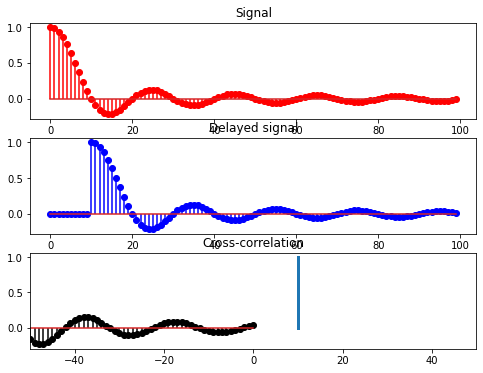

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(100)
x1 = np.sinc(n*1/10)
x2 = np.hstack((np.zeros(10), x1[:-10]))
rxy = np.correlate(x1, x2, mode="same") / np.sqrt(np.sum(x1**2) * np.sum(x2**2))

plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1); plt.stem(n, x1, "r"); plt.title("Signal")
plt.subplot(3, 1, 2); plt.stem(n, x2, "b"); plt.title("Delayed signal")
plt.subplot(3, 1, 3); plt.stem(np.arange(len(rxy))-n[-1], rxy, "k"); plt.title("Cross-correlation")
plt.xlim([-50, 50])
plt.plot([10, 10], [0, 1], linewidth=3)
plt.show()


### Examples of autocorrelation and cross-correlation


(Text(0.5, 0, 'Lags'),
 Text(0, 0.5, 'Correlation'),
 Text(0.5, 1.0, 'Correlation Analysis'))

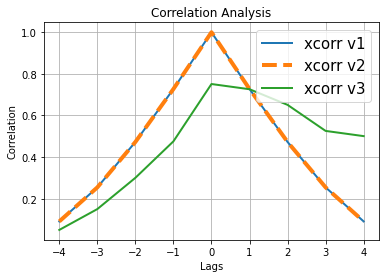

In [ ]:
# Vectors to analyze
v1 = np.arange(1, 6)
v2 = 2*v1
v3 = np.array([np.pi, np.pi/4, np.pi/2, np.pi/2, np.pi/2])

# Correlation
c1 = np.correlate(v1, v1, mode="full")/np.sum(v1**2)
c2 = np.correlate(v1, v2, mode="full")/np.sqrt(np.sum(v1**2)*np.sum(v2**2))
c3 = np.correlate(v1, v3, mode="full")/np.sqrt(np.sum(v1**2)*np.sum(v3**2))
lag1 = np.arange(-len(v1)+1, len(v1))
lag2 = np.arange(-len(v1)+1, len(v1))
lag3 = np.arange(-len(v1)+1, len(v1))

# Plot
plt.figure();plt.plot(lag1, c1, linewidth=2), plt.grid(True)
plt.plot(lag2, c2, '--', linewidth=4), plt.grid(True)
plt.plot(lag3, c3, linewidth=2), plt.grid(True)
plt.legend(["xcorr v1", "xcorr v2", "xcorr v3"], fontsize=15, loc='upper right')
plt.xlabel("Lags"), plt.ylabel("Correlation"), plt.title("Correlation Analysis")


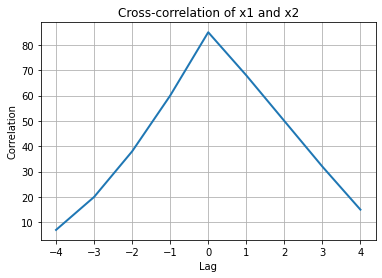

In [ ]:

# Signals
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([3, 4, 5, 6, 7])

# Cross-correlation
corr, lag = np.correlate(x1, x2, mode='full'), np.arange(-(len(x1)-1), len(x2))

# Plot
plt.figure();plt.plot(lag, corr, linewidth=2)
plt.title('Cross-correlation of x1 and x2')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)


(-4.0, 4.0)

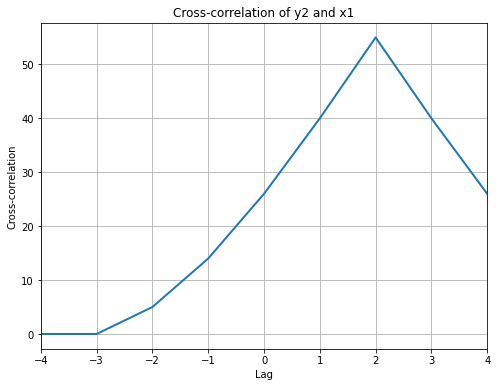

In [ ]:
# Delay of signal
y2 = np.concatenate(([0], x1))
rxy2, lag2 = np.correlate(y2, np.array([*x1, 0]), mode='full'), np.arange(-4, 7)
plt.figure(figsize=(8, 6))
plt.plot(lag2, rxy2, linewidth=2)
plt.grid(True)
plt.title('Cross-correlation of y2 and x1')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.xlim([-4, 4])

Text(0.5, 1.0, 'Cross-correlation of y3 and x1')

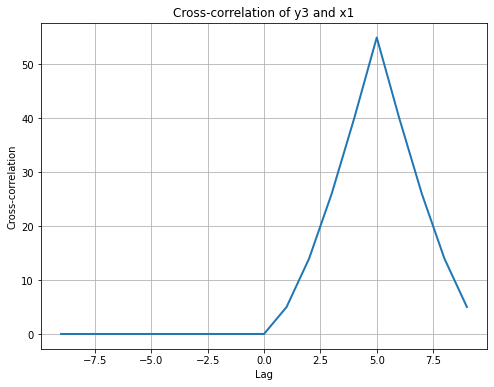

In [ ]:
# Delay of signal with longer delay
y3 = np.concatenate(([0]*5, x1))
rxy3 = np.correlate(y3, np.concatenate((x1, [0]*5)), mode='full')
lag3 = np.arange(-9, 10)
plt.figure(figsize=(8, 6))
plt.plot(lag3, rxy3, linewidth=2)
plt.grid(True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation of y3 and x1')

Text(0, 0.5, 'Cross-correlation')

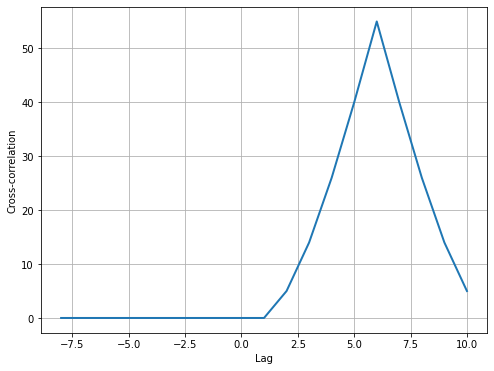

In [ ]:
y4 = np.concatenate((np.zeros(10), x1))
rxy4, lag4 = np.correlate(y4, x1, mode='full'), np.arange(-8, 11)
plt.figure(figsize=(8, 6))
plt.plot(lag4, rxy4, linewidth=2)
plt.grid()
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')

Text(0.5, 1.0, 'Cross-correlation of signal with noise')

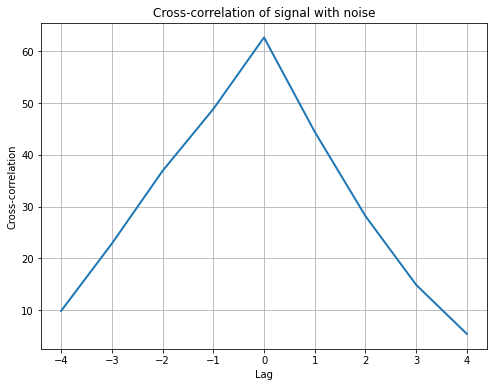

In [ ]:
# Signal with noise
y5 = x1 + np.random.rand(len(x1))
rxy5 = np.correlate(y5, x1, mode='full')
lag5 = np.arange(-4, 5)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(lag5, rxy5, linewidth=2)
plt.grid(True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation of signal with noise')

In [ ]:
# % Delayed signal with noise
# y6 = [0, y5];
# [rxy6, lag6] = xcorr(y6, x1);
# figure(24);
# plot(lag6, rxy6, "LineWidth", 2); grid on; hold on;

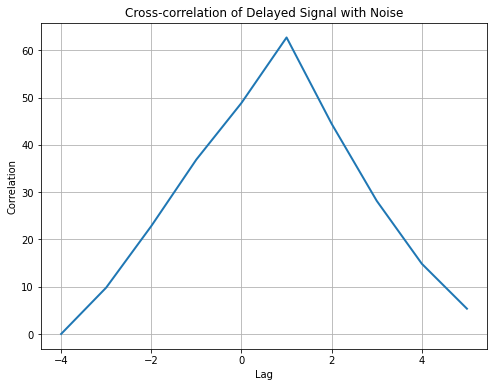

In [ ]:
# Delayed signal with noise
y6 = np.concatenate(([0], y5))
rxy6, lag6 = np.correlate(y6, x1, mode='full'), np.arange(-4, 6)
plt.figure(figsize=(8, 6))
plt.plot(lag6, rxy6, linewidth=2)
plt.grid(True)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross-correlation of Delayed Signal with Noise')
plt.show()

### Application of cross-correlation using sonar example
![image.png](https://github.com/piero-latorre/DSP/blob/main/II/image_2.png?raw=true)

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load signal
data = scipy.io.loadmat("sonar.mat")
tx = np.squeeze(data["tx"])
rx = np.squeeze(data["rx"])
fs = data["fs"].item()

# Plot of both signals
plt.figure(figsize=(8, 6))
plt.plot(tx)
plt.grid(True)
plt.title("Signal send (Tx)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.figure(figsize=(8, 6))
plt.plot(rx)
plt.grid(True)
plt.title("Signal received (Rx)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")




FileNotFoundError: ignored

In [ ]:
# Correlation and time vectors
C, lag = np.correlate(rx, tx, mode="full"), np.arange(-len(rx)+1, len(tx))
ts = 1/fs
tr = np.arange(0, len(rx))*ts
tt = np.arange(0, len(tx))*ts
lag = lag*ts

# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))
axes[0].plot(tt, tx)
axes[0].grid(True)
axes[0].set_title("Signal send (Tx)")
axes[0].set_xlabel("Time (sec)")
axes[0].set_ylabel("Amplitude")
axes[1].plot(tr, rx)
axes[1].grid(True)
axes[1].set_title("Signal received (Rx)")
axes[1].set_xlabel("Time (sec)")
axes[1].set_ylabel("Amplitude")
axes[2].plot(lag, C)
axes[2].grid(True)
axes[2].set_title("Cross-correlation")
axes[2].set_xlabel("Time (sec)")
axes[2].set_ylabel("Amplitude")


In [ ]:

# Time delay
time_delay = lag[np.argmax(C)]

# Output
print(f"The delay of the signals is {time_delay:.2f} seconds")
travel_time = time_delay/2
vel = 343
dist = vel*travel_time
print(f"The distance between the object and the sonar is {dist:.3f}m.")